## I scraped reviews of boAt Airdopes 121v2  from amazon website.
## Then I performed Sentiment analysis on it. At last I performed Emotion mining by
## vectorizing the Reviews and predicting their values using Linear SVM.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import nltk
from wordcloud import WordCloud

In [2]:
!pip install spacy

In [3]:
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy

## Applying Web Scraping

In [4]:
# import module
import requests
from bs4 import BeautifulSoup

HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

# user define function
# Scrape the data
def getdata(url):
    r = requests.get(url, headers=HEADERS)
    return r.text


def html_code(url):

# pass the url
# into getdata function
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')

# display html code
    return (soup)

## Scraping Review title

In [5]:
 title = []
 def get_review_title(soup):
    review_title = soup.find_all('a', {'data-hook': 'review-title'})
    for i in review_title:
        title.append(i.find('span').text.strip())
    #return title

## Scraping Reviews (body)

In [6]:
body = []
def get_review_body(soup):
    review_body = soup.find_all('span', {'data-hook': 'review-body'})
    for i in review_body:
        body.append(i.find('span').text.strip())
    #return body

## Scraping usernames

In [7]:
userlist = []
def get_username(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    for item in reviews:
        userlist.append(item.find('span').text.strip())

## Getting reviews from 20 review pages . Total of 160 reviews scraped.

In [8]:
# Getting reviews of 20 pages
for x in range(1,21):
    soup = html_code(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_username(soup)
    get_review_title(soup)
    #print(len(title))
    get_review_body(soup)

Getting page: 1
Getting page: 2
Getting page: 3
Getting page: 4
Getting page: 5
Getting page: 6
Getting page: 7
Getting page: 8
Getting page: 9
Getting page: 10
Getting page: 11
Getting page: 12
Getting page: 13
Getting page: 14
Getting page: 15
Getting page: 16
Getting page: 17
Getting page: 18
Getting page: 19
Getting page: 20


In [9]:
df = pd.DataFrame(userlist, columns= ['UserName'])
df['Review Title'] = title 
df['Review'] = body
df


,UserName,Review Title,Review
0,Amazon Customer,Edit: Stopped functioning in 3 months.,Sound Quality is Impressive. Nothing to compla...
1,Bhavik Devani,Charging case cap loose.,Though I got the product at discounted price b...
2,Mohandas K K,Terrific product for budget !!!👍,"Don't hear what haters say, still best2 months..."
3,Shahith,Not To Go!!!!,Honestly this product is not Good. Return & Re...
4,neha rai,Empty box,HiSo here we go this useless product today onl...
...,...,...,...
195,gayatri,Boat airpodes,Hello amazon. This is my humble request please...
196,Venkatesh,Decent product in this price range,I got the parcel today which was ordered yeste...
197,P.M,Falls down all the time,It's sound quality is ok but it doesn't fit in...
198,Sanjeev SK,Doesn’t stay in the ears comfortably,The ear pods did not fit snugly into my ears. ...


In [10]:
df.shape

(200, 3)

In [11]:
df.isnull().sum()

UserName        0
Review Title    0
Review          0
dtype: int64

## Data Cleaning
## Removing emojis

In [12]:
 text = u'This dog \U0001f602'
# print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
def remove_emoji(text):
    text = emoji_pattern.sub(r'', text) # no emoji
    return text

In [13]:
df['Review'] = df['Review'].apply(remove_emoji)
df.head()

,UserName,Review Title,Review
0,Amazon Customer,Edit: Stopped functioning in 3 months.,Sound Quality is Impressive. Nothing to compla...
1,Bhavik Devani,Charging case cap loose.,Though I got the product at discounted price b...
2,Mohandas K K,Terrific product for budget !!!👍,"Don't hear what haters say, still best2 months..."
3,Shahith,Not To Go!!!!,Honestly this product is not Good. Return & Re...
4,neha rai,Empty box,HiSo here we go this useless product today onl...


In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MONIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MONIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Removing stopwords and emoticons

In [15]:
stopwords_english =  stopwords.words('english')

emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3' , ':D', '.:D'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

In [16]:
lemmatizer = WordNetLemmatizer()

def clean_data(text):
    text_clean = []
    text_tokens = word_tokenize(text)
    #text_tokens = tokenizer.tokenize(text)    
    for word in text_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = lemmatizer.lemmatize(word) # stemming word
            text_clean.append(stem_word)
    
    list_to_str = ' '.join([str(ele) for ele in text_clean])
    return list_to_str.lower()

In [17]:
df['Review'] = df['Review'].apply(clean_data)

In [18]:
df.head()

,UserName,Review Title,Review
0,Amazon Customer,Edit: Stopped functioning in 3 months.,sound quality impressive nothing complain abou...
1,Bhavik Devani,Charging case cap loose.,though i got product discounted price quality ...
2,Mohandas K K,Terrific product for budget !!!👍,do n't hear hater say still best2 month usage ...
3,Shahith,Not To Go!!!!,honestly product good return replaced product ...
4,neha rai,Empty box,hiso go useless product today got item guess ’...


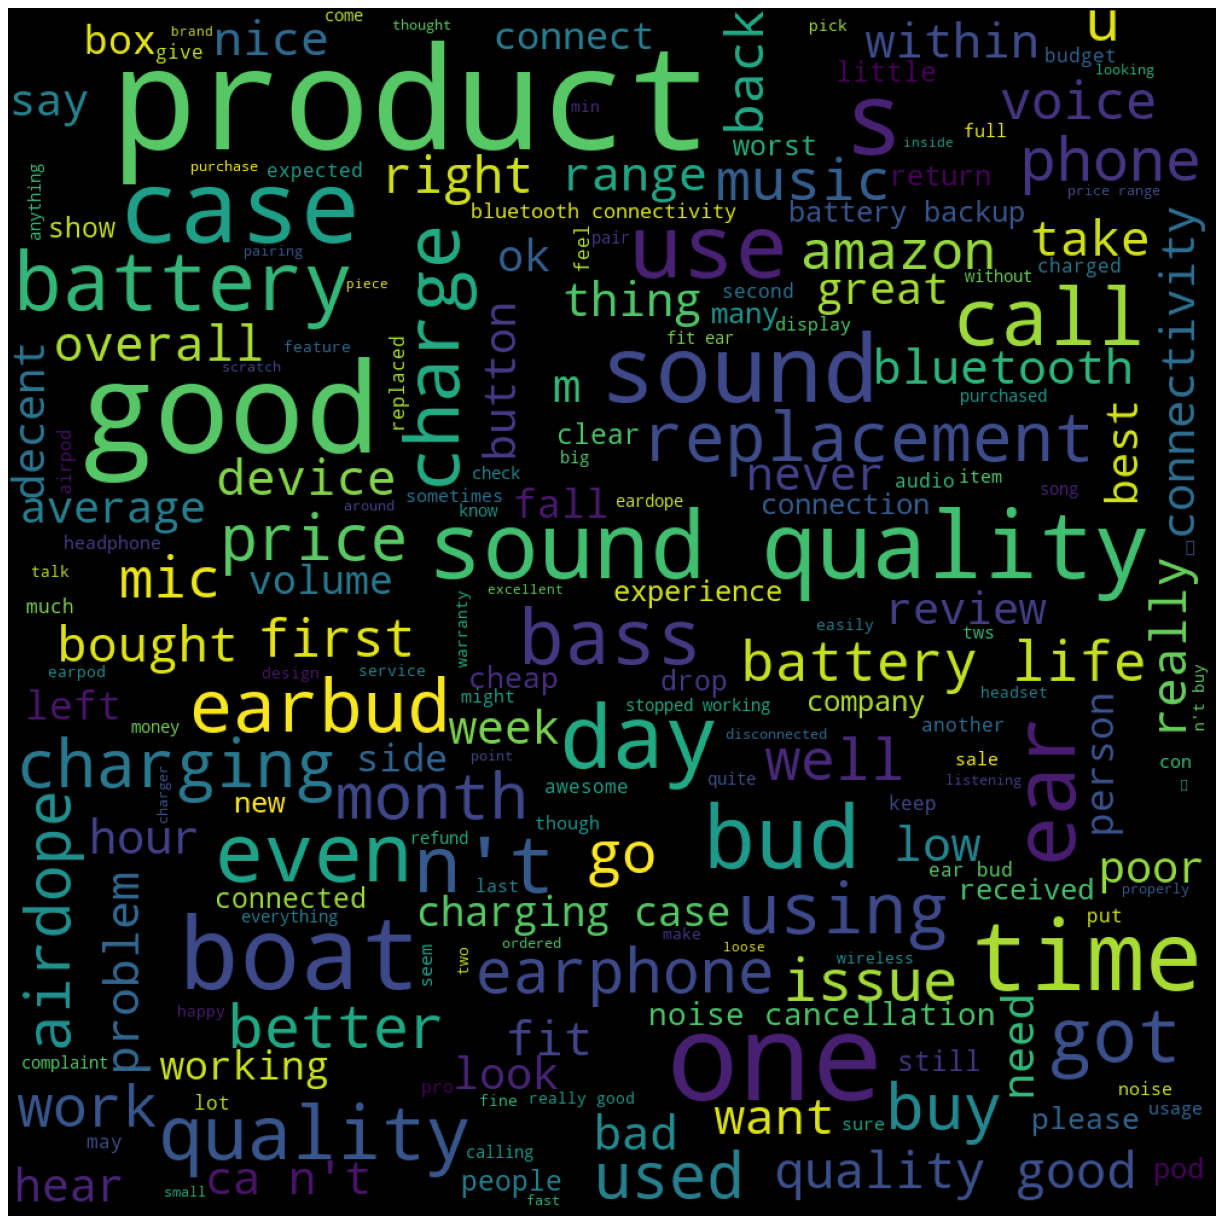

In [19]:
# Generating a wordcloud
allwords = " ".join([txt for txt in df["Review"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Using vader_lexicon for sentiment analysis

In [20]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MONIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [23]:
df["analysis"] = df["Review"].apply(get_vader_sentiment)
df.head(10)

,UserName,Review Title,Review,analysis
0,Amazon Customer,Edit: Stopped functioning in 3 months.,sound quality impressive nothing complain abou...,positive
1,Bhavik Devani,Charging case cap loose.,though i got product discounted price quality ...,negative
2,Mohandas K K,Terrific product for budget !!!👍,do n't hear hater say still best2 month usage ...,positive
3,Shahith,Not To Go!!!!,honestly product good return replaced product ...,positive
4,neha rai,Empty box,hiso go useless product today got item guess ’...,positive
5,Rahul Jacob,Edit after 10days of use - not genuine product,edit one earphone stopped working thank fully ...,positive
6,Jayaprakash,Ok,worth money i bought 999,positive
7,Amazon Customer,Bang for your buck!,i bought great indian sale ₹999tldr good sound...,positive
8,Sunita Singh,"""Left bud stopped working with 10 days""",nice bluetooth earphone range `` '' amazon rea...,negative
9,TANMAY JALGAONKAR,Value for money!!,i bought amazon great indian sale 2020 price t...,positive


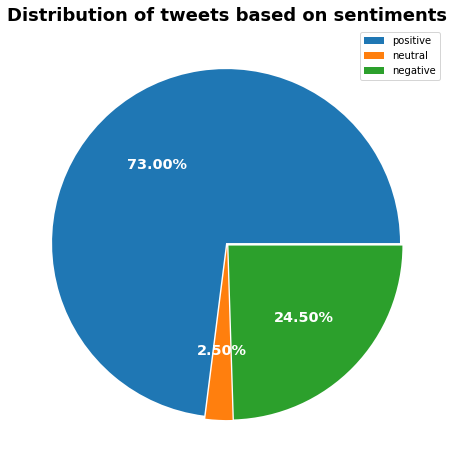

In [24]:
plt.figure(figsize = (10, 8))
twt_count = df[df['analysis'] == 'positive'].count().to_list()[0] , df[df['analysis'] == 'neutral'].count().to_list()[0] , df[df['analysis'] == 'negative'].count().to_list()[0]
plt.pie(twt_count, 
        labels = ['positive', 'neutral', 'negative'],
        autopct = '%.2f%%',
        explode=[0.01]*3, 
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '0',
                     'color' : 'w'})
plt.legend()
plt.title('Distribution of tweets based on sentiments', fontsize = 18, fontweight = 'bold')
plt.show()

## Getting compound scores for analysis of top positive and negative reviews

In [25]:
def get_compound_scores(text):
    return sia.polarity_scores(text)['compound']

In [26]:
df['score'] = df['Review'].apply(get_compound_scores)
df.head()

,UserName,Review Title,Review,analysis,score
0,Amazon Customer,Edit: Stopped functioning in 3 months.,sound quality impressive nothing complain abou...,positive,0.8079
1,Bhavik Devani,Charging case cap loose.,though i got product discounted price quality ...,negative,-0.2732
2,Mohandas K K,Terrific product for budget !!!👍,do n't hear hater say still best2 month usage ...,positive,0.8868
3,Shahith,Not To Go!!!!,honestly product good return replaced product ...,positive,0.4242
4,neha rai,Empty box,hiso go useless product today got item guess ’...,positive,0.9094


In [27]:
# Top 10 positive Reviews
df_sort = df.sort_values(by = 'score' , ascending= False)
df_sort.head(20)

,UserName,Review Title,Review,analysis,score
115,Kakali Chatterjee,Just phenomenal at a tight budget!,honestly i n't expected product price range go...,positive,0.9986
7,Amazon Customer,Bang for your buck!,i bought great indian sale ₹999tldr good sound...,positive,0.9941
133,Dr. Amit Saini,best budget wireless earbuds ever bought,one amazing purchase ever made battery backup ...,positive,0.9896
25,Javeed Ahmad,"Very nice,charming,stunning,wonderful and beau...",i receive item it really marvellous stunning b...,positive,0.9888
142,Rj,The bass is terrific but not the ideal buy!,to start price boat earbuds n't disappointed t...,positive,0.9883
141,Navya,Good but not the Best!,it 's 2 month since i 've purchased airdopes w...,positive,0.9876
68,Parth K,"Very cool looks, light weight, fragile.",very compact size including charging box very ...,positive,0.9856
84,Joey,Good technology but sound can be way better!,good technology nice product all.pros fast con...,positive,0.9847
23,Prakash Manchanda,Highy Recommended,wonderful perfect airpods.i liked much.pros -1...,positive,0.9823
91,KANWAL ROOP SINGH,pretty good,airdopes fine aspect best thing liked design f...,positive,0.9817


Text(0, 0.5, 'Score')

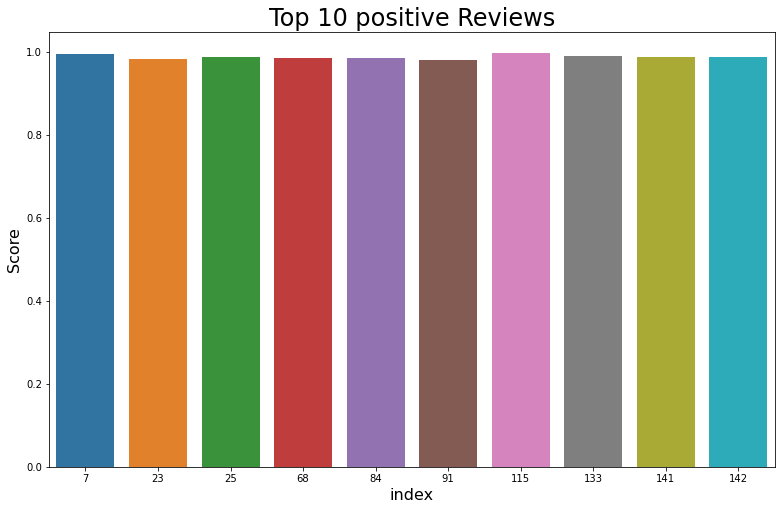

In [28]:
plt.figure(figsize= (13,8))
sns.barplot(x = df_sort.index[0:10] , y = df_sort.score[0:10])
plt.title('Top 10 positive Reviews' , fontsize = 24)
plt.xlabel('index', fontsize = 16)
plt.ylabel('Score', fontsize = 16)

## Printing top positive review

In [29]:
df.loc[df['score'].argmax()]['Review'] , df.loc[df['score'].argmax()]['score']

("honestly i n't expected product price range good i wanted low priced tws deliver decent audio experience but really blew mind i fan boat product i like many boat product home never disappointed this boat 121v2 tws also follows legacy.let share view day usage.- let 's first talk sound quality bass ok noise cancellation well 's but still sound quality blow mind it finely calibrated driver delivery best that said eartips provided good if really want nice bass plus little bit noise cancellation easily pair large eartips my ear suited small medium one came i go black large eartips helped lot deliver bud best.- the chipset used cheap it actually support hd audio but i would amazed supported qualcomm apt x tws sony ldac audio codec still price range get hd audio happy the best thing battery it 's monster it went full 1 day long single full charge i guess boat n't cheap battery the design case ok it 's slim honest still protrudes store small pocket pant creates bump but bud awesome-ly design

## Top 10 negative reviews

Text(0, 0.5, 'Score')

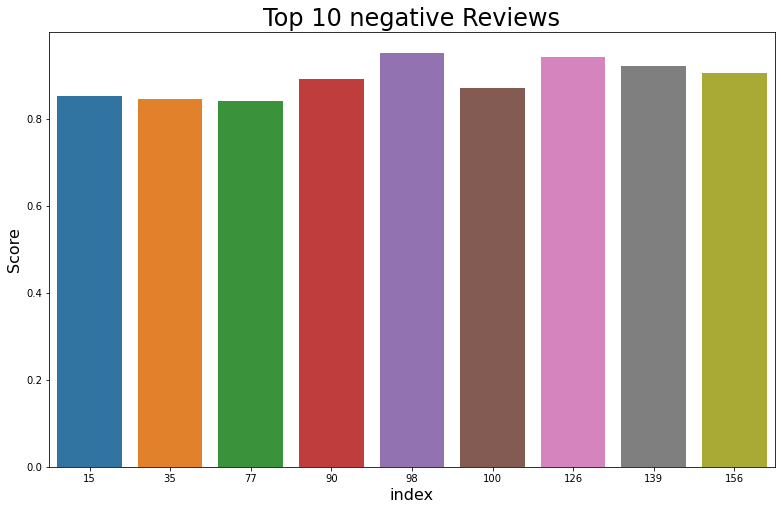

In [30]:
plt.figure(figsize= (13,8))
sns.barplot(x = df_sort.index[:-10:-1] , y = abs(df_sort.score[:-10:-1]))
plt.title('Top 10 negative Reviews' , fontsize = 24)
plt.xlabel('index', fontsize = 16)
plt.ylabel('Score', fontsize = 16)

In [58]:
df.loc[96]['Review'] , df.loc[96]['score']

("the quality mic poor person side hear anything properly even i indoor noise around i also receive extra ear tip box build quality okay price sound quality music good price but lack terribly basic use product 's mic sound poor i never used heard product bad mic rs.50 earphone better mic i going throw garbage area front house trying replace product see one little better the problem focused splash proofing product gap voice go it totally muffed it sound like mic pillow person talking pillow do n't buy spend little extra get realme bud q may",
 -0.7355)

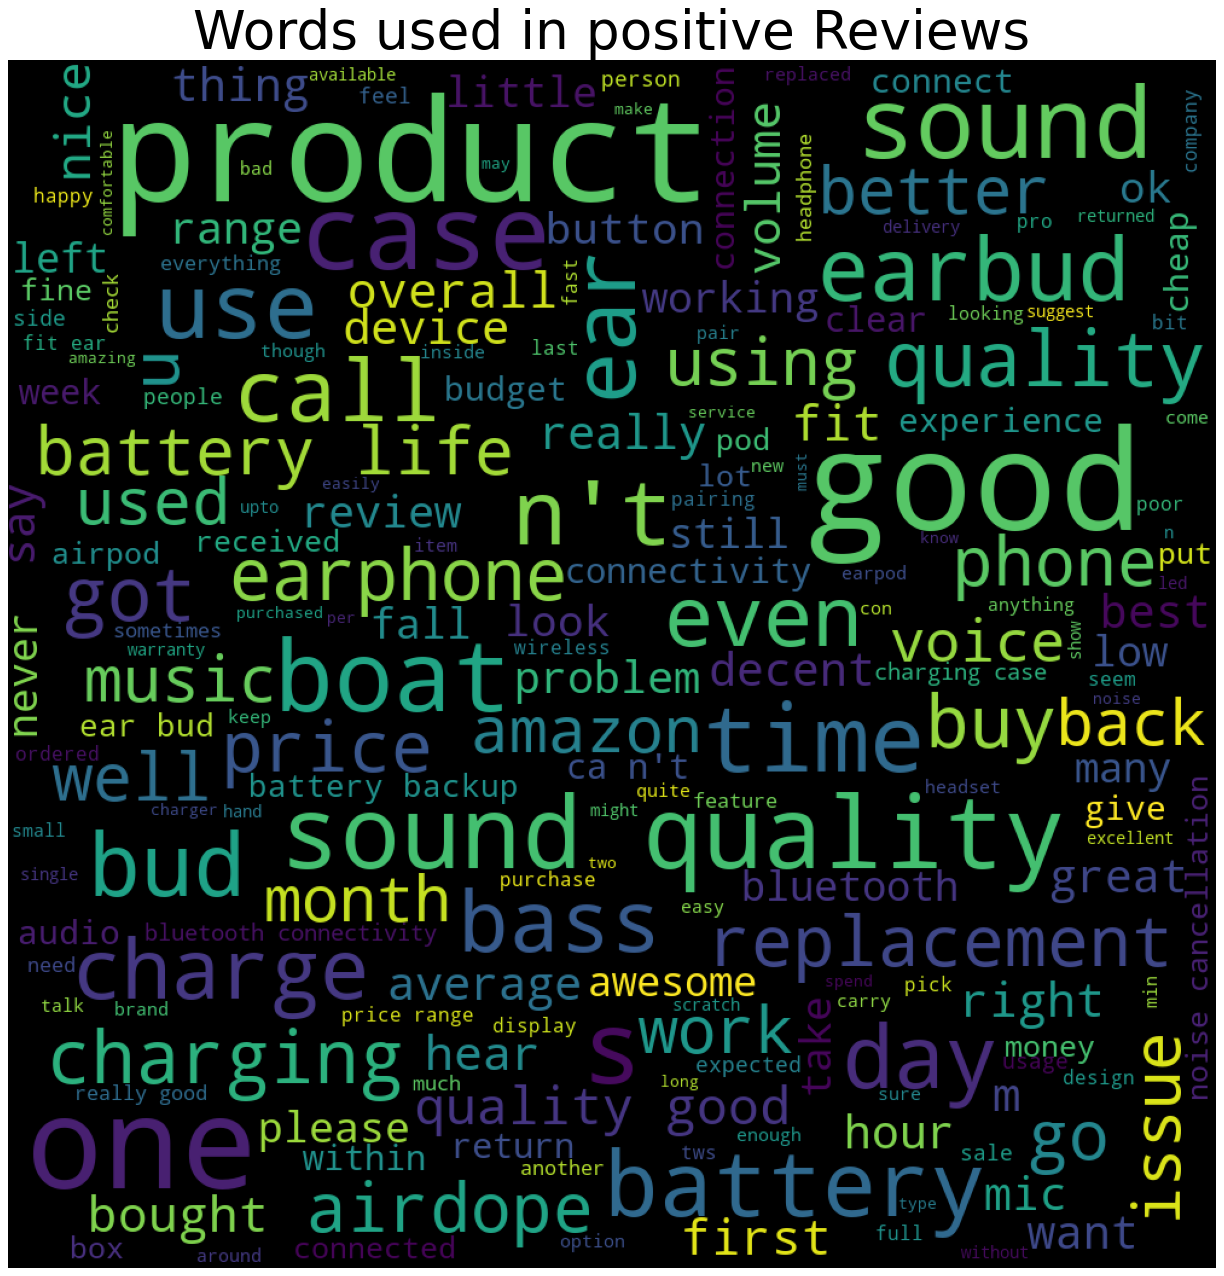

In [32]:
# Generating a wordcloud
allwords = " ".join([txt for txt in df_sort[df_sort['score'] > 0]['Review']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.title('Words used in positive Reviews' , fontsize = 48)
plt.show()

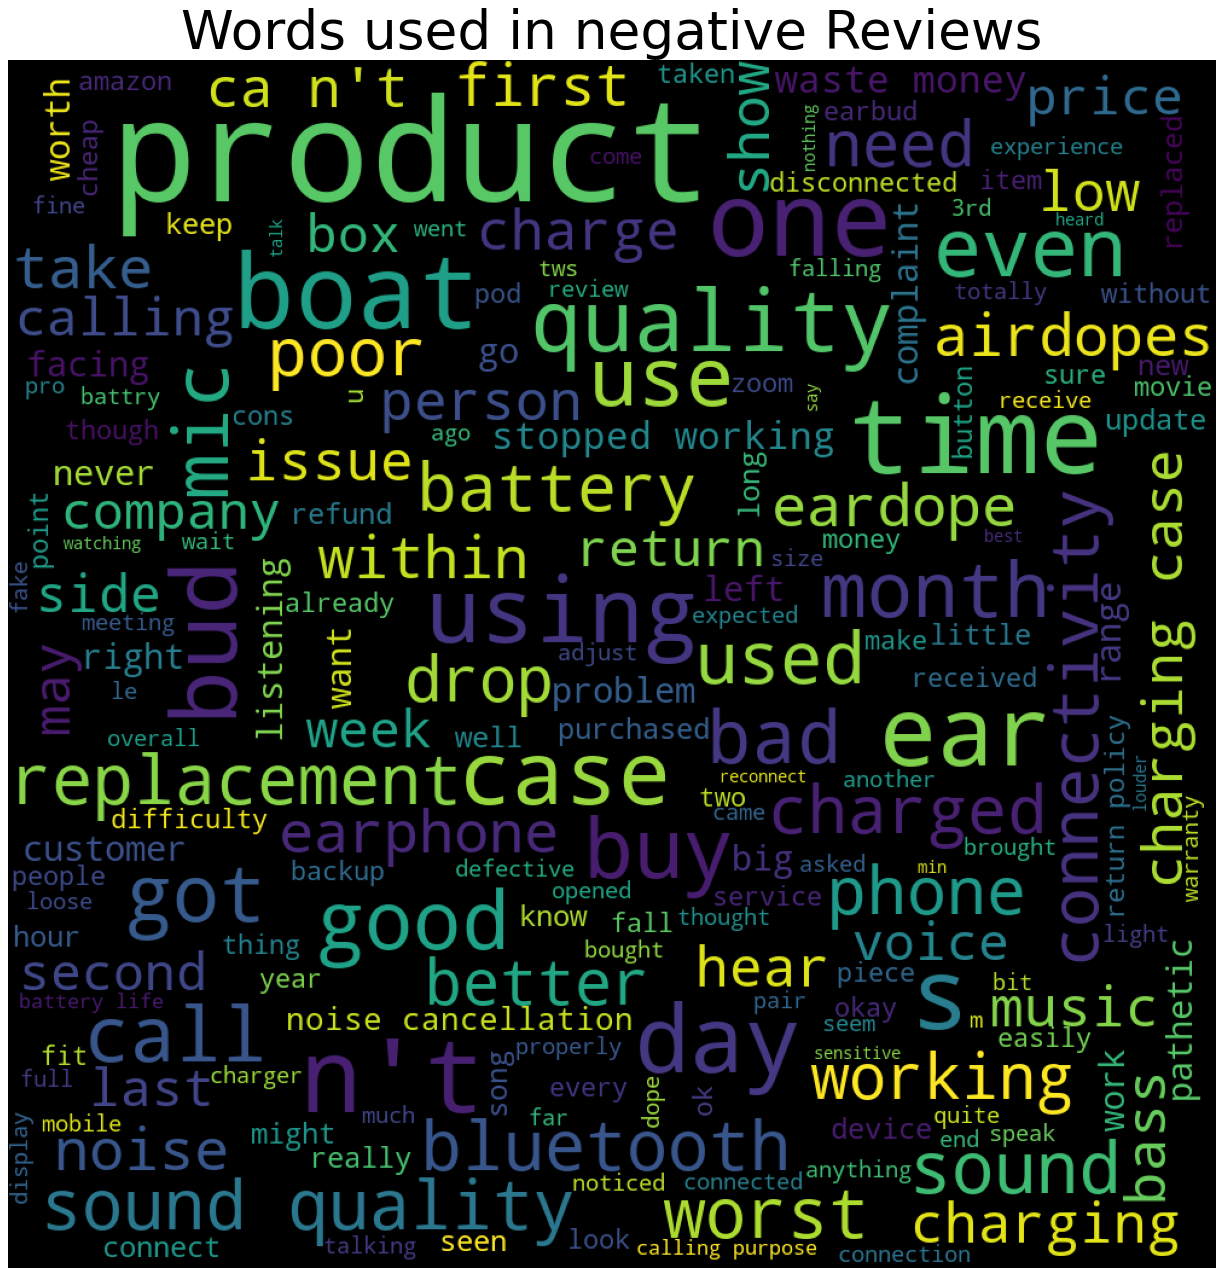

In [33]:
allwords = " ".join([txt for txt in df_sort[df_sort['score'] < 0]['Review']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.title('Words used in negative Reviews' , fontsize = 48)
plt.show()

## Emotion mining


## Getting affinity scores for english words

In [34]:
!pip install afinn

In [35]:
from afinn import Afinn

In [36]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [37]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [38]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [39]:
!pip install spacy 
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-12-10 10:18:49.762238: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-12-10 10:18:49.762329: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [40]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [41]:
df['Sentiment_value'] = df['Review'].apply(calculate_sentiment)

In [42]:
# Calculating no. of words in each review
df['word_count'] = df['Review'].str.split().apply(len)
df.head(10)

,UserName,Review Title,Review,analysis,score,Sentiment_value,word_count
0,Amazon Customer,Edit: Stopped functioning in 3 months.,sound quality impressive nothing complain abou...,positive,0.8079,1,58
1,Bhavik Devani,Charging case cap loose.,though i got product discounted price quality ...,negative,-0.2732,-3,13
2,Mohandas K K,Terrific product for budget !!!👍,do n't hear hater say still best2 month usage ...,positive,0.8868,9,49
3,Shahith,Not To Go!!!!,honestly product good return replaced product ...,positive,0.4242,5,81
4,neha rai,Empty box,hiso go useless product today got item guess ’...,positive,0.9094,6,25
5,Rahul Jacob,Edit after 10days of use - not genuine product,edit one earphone stopped working thank fully ...,positive,0.1531,1,37
6,Jayaprakash,Ok,worth money i bought 999,positive,0.2263,2,5
7,Amazon Customer,Bang for your buck!,i bought great indian sale ₹999tldr good sound...,positive,0.9941,20,183
8,Sunita Singh,"""Left bud stopped working with 10 days""",nice bluetooth earphone range `` '' amazon rea...,negative,-0.5750,-9,69
9,TANMAY JALGAONKAR,Value for money!!,i bought amazon great indian sale 2020 price t...,positive,0.9509,14,34


In [43]:
a = pd.Series(df[df['Sentiment_value'] > 0]['analysis'] == 'negative')

In [44]:
a.value_counts()

False    129
True      11
Name: analysis, dtype: int64

In [45]:
b = pd.Series(df[df['Sentiment_value'] < 0]['analysis'] == 'positive')
b.value_counts()

False    31
True     10
Name: analysis, dtype: int64

## Model building

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
def get_value(i):
    if i>0:
        return 1
    elif i==0:
        return 0
    else:
        return -1

In [48]:
df['target'] = df['Sentiment_value'].apply(get_value)

In [49]:
df

,UserName,Review Title,Review,analysis,score,Sentiment_value,word_count,target
0,Amazon Customer,Edit: Stopped functioning in 3 months.,sound quality impressive nothing complain abou...,positive,0.8079,1,58,1
1,Bhavik Devani,Charging case cap loose.,though i got product discounted price quality ...,negative,-0.2732,-3,13,-1
2,Mohandas K K,Terrific product for budget !!!👍,do n't hear hater say still best2 month usage ...,positive,0.8868,9,49,1
3,Shahith,Not To Go!!!!,honestly product good return replaced product ...,positive,0.4242,5,81,1
4,neha rai,Empty box,hiso go useless product today got item guess ’...,positive,0.9094,6,25,1
...,...,...,...,...,...,...,...,...
195,gayatri,Boat airpodes,hello amazon this humble request please i want...,positive,0.6705,1,44,1
196,Venkatesh,Decent product in this price range,i got parcel today ordered yesterday external ...,positive,0.6705,5,59,1
197,P.M,Falls down all the time,it 's sound quality ok n't fit ear fall time o...,negative,-0.2982,2,26,1
198,Sanjeev SK,Doesn’t stay in the ears comfortably,the ear pod fit snugly ear i push deep ear cou...,positive,0.4767,-1,41,-1


In [50]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.pipeline import Pipeline

In [51]:
vectorizer = CountVectorizer()
svc = LinearSVC()

In [52]:
vectorizer2 = CountVectorizer()
x = vectorizer.fit_transform(df['Review'])
x.toarray()
y = df['target']


In [53]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size= 0.20 , random_state= 42)


In [54]:
svc.fit(x_train , y_train)
y_pred = svc.predict(x_test)
pd.Series(y_pred).value_counts()

 1    32
-1     5
 0     3
dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [56]:
confusion_matrix(y_pred , y_test)

array([[ 2,  3,  0],
       [ 1,  1,  1],
       [ 6,  1, 25]], dtype=int64)

In [57]:
accuracy_score(y_pred , y_test)

0.7